# 라이브러리 호출

In [102]:
!pip install pytimekr

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pytimekr, since package 'wheel' is not installed.
  Running setup.py install for pytimekr: started
  Running setup.py install for pytimekr: finished with status 'done'


In [107]:
import requests
import json
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.common.by import By

from pytimekr import pytimekr
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
day = dt.datetime(2021, 8, 22)
term = dt.timedelta(days=30)
term_1 = dt.timedelta(days=1)

# 데이터 수집

## 통행시간 데이터

In [ ]:


# 크롬을 실행하는 driver 객체를 만들면 크롬이 실행된다.
driver = webdriver.Chrome()

# driver 객체의 get메소드를 사용해서 원하는 URL로 이동할 수 있다.
driver.get("http://data.ex.co.kr/portal/time/timeCity#")



In [ ]:
for i in range(0,42):

    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').clear()
    driver.find_element(By.CSS_SELECTOR,'#searchDay').clear()
    time.sleep(1)
    day_from = day - term
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').send_keys(day_from.strftime("%Y.%m.%d"))
    driver.find_element(By.CSS_SELECTOR,'#searchDay').send_keys(day.strftime("%Y.%m.%d"))
    day = day_from - term_1
    driver.find_element(By.CSS_SELECTOR,'#frmSearch > div:nth-child(2) > div.item > div > span:nth-child(1) > img').click()
    driver.find_element(By.CSS_SELECTOR,'#btnSearch > span').click()
    time.sleep(6)
    driver.find_element(By.CSS_SELECTOR,'#btnCsv > span').click()
    time.sleep(3)

In [ ]:
driver.close()

## 통행량 데이터

In [ ]:
# 크롬을 실행하는 driver 객체를 만들면 크롬이 실행된다.
driver = webdriver.Chrome()

# driver 객체의 get메소드를 사용해서 원하는 URL로 이동할 수 있다.
driver.get("http://data.ex.co.kr/portal/traffic/trafficUpDownIc#")

In [ ]:
day = dt.datetime(2022, 9, 1)
term = dt.timedelta(days=30)
term_1 = dt.timedelta(days=1)

In [ ]:
for i in range(0,60):
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').clear()
    driver.find_element(By.CSS_SELECTOR,'#searchDay').clear()
    time.sleep(1)
    day_from = day - term
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').send_keys(day_from.strftime("%Y.%m.%d"))
    driver.find_element(By.CSS_SELECTOR,'#searchDay').send_keys(day.strftime("%Y.%m.%d"))
    day = day_from - term_1
    driver.find_element(By.CSS_SELECTOR,'#frmSearch > div:nth-child(2) > div:nth-child(4) > span:nth-child(1) > img').click()
    driver.find_element(By.CSS_SELECTOR,'#btnSearch > span').click()
    time.sleep(3)
    driver.find_element(By.CSS_SELECTOR,'#btnCsv > span').click()
    time.sleep(2)

In [ ]:
df_sample = pd.read_csv('./통행시간/OpenOASIS (1).csv',encoding='cp949')

In [ ]:
df_sample

,출발,도착,자료종류,시간,2022.08.29,2022.08.28,2022.08.27,2022.08.26,2022.08.25,2022.08.24,...,2022.08.08,2022.08.07,2022.08.06,2022.08.05,2022.08.04,2022.08.03,2022.08.02,2022.08.01,2022.07.31,2022.07.30
0,서울,부산,평균값,00시,249,0,239,251,0,211,...,254,215,270,325,0,225,0,261,195,272
1,서울,부산,평균값,01시,246,296,0,260,246,243,...,0,213,262,0,0,0,368,256,212,273
2,서울,부산,평균값,02시,248,279,0,0,268,243,...,244,0,255,296,0,0,312,0,0,246
3,서울,부산,평균값,03시,0,0,0,0,0,282,...,241,0,248,0,221,0,306,257,258,266
4,서울,부산,평균값,04시,237,264,335,0,0,310,...,0,206,0,0,226,234,0,294,0,251
5,서울,부산,평균값,05시,0,0,0,260,0,258,...,225,0,0,0,0,404,0,0,0,241
6,서울,부산,평균값,06시,236,252,0,0,0,250,...,225,0,245,272,0,0,0,0,229,0
7,서울,부산,평균값,07시,0,0,0,291,251,236,...,231,277,0,269,0,0,0,0,270,274
8,서울,부산,평균값,08시,239,0,248,284,0,236,...,248,310,235,261,235,0,0,290,0,311
9,서울,부산,평균값,09시,241,0,0,280,0,0,...,0,0,226,252,233,0,0,279,272,267


# 데이터 전처리

## 통행시간

In [387]:
def func(a):
    if len(str(a)) > 3:
        h,m = map(int,a.split(':'))
        t = h*60 + m
        return int(t)
    return a

def transform(a):
    return a.replace('.','-')


In [388]:
df_time = pd.DataFrame()

for i in range(1,73):
    df = pd.read_csv(f'./통행시간/OpenOASIS ({i}).csv',encoding='cp949')

    df.drop(['출발','도착','자료종류'],axis=1,inplace=True)

    df = df.transpose()

    df.columns = df.loc['시간',:]
    df.drop('시간',inplace=True)

    df = df.replace('0', np.NaN)
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    
    df_time = pd.concat([df_time,df[['12시']]])
    
df_time['12시'] = df_time['12시'].apply(func)
df_time.index = pd.to_datetime(df_time.index)
df_time = df_time.asfreq('D')

In [389]:
df_time

시간,12시
2016-07-20,275
2016-07-21,275
2016-07-22,263
2016-07-23,280
2016-07-24,264
...,...
2022-08-25,265
2022-08-26,282
2022-08-27,282
2022-08-28,282


## 이용차량

In [390]:
df_traffic = pd.read_csv('./이용차량/OpenOASIS (1).csv',encoding='cp949')

for i in range(2,68):
    df_tmp1 = pd.read_csv(f'./이용차량/OpenOASIS ({i}).csv',encoding='cp949')
    df_traffic = pd.concat([df_tmp1,df_traffic])
    
df_traffic.drop(['출발','도착'],axis=1,inplace=True)

df_traffic['일자'] = pd.to_datetime(df_traffic['일자'])
df_traffic.drop_duplicates('일자',inplace=True)
df_traffic.set_index('일자', inplace=True)

df_traffic = df_traffic.asfreq('D')


In [391]:
df_traffic

,교통량
일자,
2017-07-30,35.0
2017-07-31,37.0
2017-08-01,39.0
2017-08-02,56.0
2017-08-03,38.0
...,...
2022-08-28,11.0
2022-08-29,12.0
2022-08-30,11.0


## merge

In [392]:
df= pd.merge(df_time,df_traffic,left_index=True,right_on='일자')
# https://haloaround.tistory.com/267

In [393]:
df

,12시,교통량
일자,,
2017-07-30,261,35.0
2017-07-31,300,37.0
2017-08-01,300,39.0
2017-08-02,278,56.0
2017-08-03,286,38.0
...,...,...
2022-08-25,265,10.0
2022-08-26,282,11.0
2022-08-27,282,11.0


## 추가 Feature 생성

In [394]:
lst = []

for idx in df.index :
    chuseok = pytimekr.chuseok(idx.year)
    if idx.strftime('%Y-%m-%d') == chuseok.strftime('%Y-%m-%d'):
        lst.append(1)
        print('1')
    else:
        lst.append(0)
df['추석'] = lst

1
1
1
1
1


In [395]:
df['추석_D+1'] = df['추석'].shift()
df['추석_D-1'] = df['추석'].shift(-1)
df['추석_D-7'] = df['추석'].shift(-7)
df['12시_lag_day1'] = df['12시'].shift()
df['12시_lag_day7'] = df['12시'].shift(7)
df['12시_lag_day30'] = df['12시'].shift(30)
df['교통량_lag_day1'] = df['교통량'].shift()
df['교통량_lag_day7'] = df['교통량'].shift(7)
df['교통량_lag_day30'] = df['교통량'].shift(30)
df.dropna(inplace=True)

In [396]:
df['추석_D+1'] = df['추석_D+1'].astype(int)
df['추석_D-1'] = df['추석_D-1'].astype(int)
df['추석_D-7'] = df['추석_D-7'].astype(int)

In [329]:
df.loc['2019-09-06']

12시              262.0
교통량               15.0
추석                 0.0
추석_D+1             0.0
추석_D-1             0.0
추석_D+7             1.0
12시_lag_day1     238.0
12시_lag_day7     255.0
12시_lag_day30    269.0
교통량_lag_day1       7.0
교통량_lag_day7      19.0
교통량_lag_day30     25.0
Name: 2019-09-06 00:00:00, dtype: float64

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1804 entries, 2017-08-29 to 2022-08-22
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   12시            1804 non-null   int64  
 1   교통량            1804 non-null   float64
 2   추석             1804 non-null   int64  
 3   추석_D+1         1804 non-null   int32  
 4   추석_D-1         1804 non-null   int32  
 5   추석_D+7         1804 non-null   int32  
 6   12시_lag_day1   1804 non-null   float64
 7   12시_lag_day7   1804 non-null   float64
 8   12시_lag_day30  1804 non-null   float64
 9   교통량_lag_day1   1804 non-null   float64
 10  교통량_lag_day7   1804 non-null   float64
 11  교통량_lag_day30  1804 non-null   float64
dtypes: float64(7), int32(3), int64(2)
memory usage: 162.1 KB


In [397]:
df.to_csv('data_final.csv')

----

# 모델링

## 라이브러리

In [151]:
import requests
import json
import pandas as pd

import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [331]:
def residual_diag(residuals, lags = 20) :

    print('* 정규성 검정(> 0.05) : ', round(stats.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adf_testuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

In [398]:
target = 'y'

df[target] = df['12시'].shift(-7)
df.dropna(inplace=True)


x = df.drop([target], axis = 1)
y = df.loc[:, target]

In [399]:
from sklearn.model_selection import TimeSeriesSplit

# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=30)

In [400]:
rmse, mae, mape, aic = [],[],[],[]
residuals = []
preds = []
p,d,q = 4,1,4

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    train = y[train_index]
    val = y[val_index]

    # 학습
    model = sm.tsa.SARIMAX(train, order=(p,d,q)).fit()

    # 예측
    pred = model.forecast(val_size)
    preds += list(pred)

    # 잔차 저장
    residuals += list(model.resid)

    # 평가
    rmse.append(mean_squared_error(val, pred, squared = False))
    mae.append(mean_absolute_error(val, pred))
    mape.append(mean_absolute_percentage_error(val, pred))
    aic.append(model.aic)

In [401]:
train = y[:-30]
val = y[-30:]

## 모델링

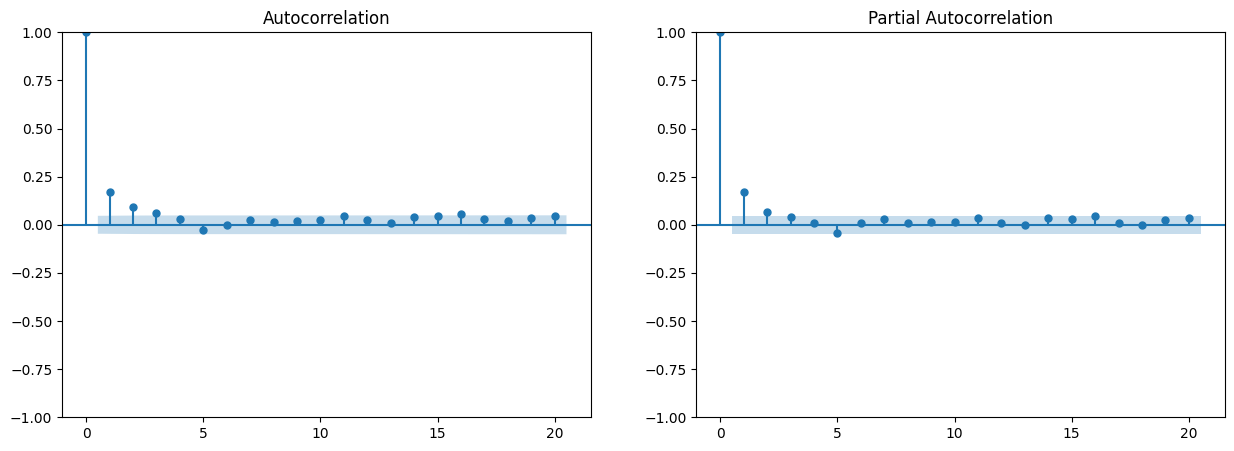

In [336]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(train, lags = lags, ax = ax[0])
plot_pacf(train, lags = lags, ax = ax[1])
plt.show()

In [337]:
from itertools import product

p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [0,1]
iter = list(product(p,d,q))
iter

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

## ARIMA

In [338]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(val, pred))
    aic.append(model_fit.aic)
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [339]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
30,"(3, 0, 0)",12.235871,17240.544567


,"params(p,d,q)",mae,aic
17,"(1, 1, 2)",12.408262,16831.254765


In [345]:
model2_1 = sm.tsa.SARIMAX(train, order=(3,0,0)).fit()
model2_2 = sm.tsa.SARIMAX(train, order=(1,1,2)).fit()

In [343]:
residuals = model2_1.resid
residual_diag(residuals)

* 정규성 검정(> 0.05) :  0.0


AttributeError: module 'statsmodels.tsa.stattools' has no attribute 'adf_testuller'

In [344]:
residuals = model2_2.resid
residual_diag(residuals)

* 정규성 검정(> 0.05) :  0.0


AttributeError: module 'statsmodels.tsa.stattools' has no attribute 'adf_testuller'

In [168]:
pred2_1 = model2_1.forecast(30)
mean_absolute_percentage_error(val, pred2_1)

0.044103502868436374

In [346]:
pred2_2 = model2_2.forecast(30)
mean_absolute_percentage_error(val, pred2_2)

0.04323940821444781

In [347]:
pred2_1.index = val.index
pred2_2.index = val.index

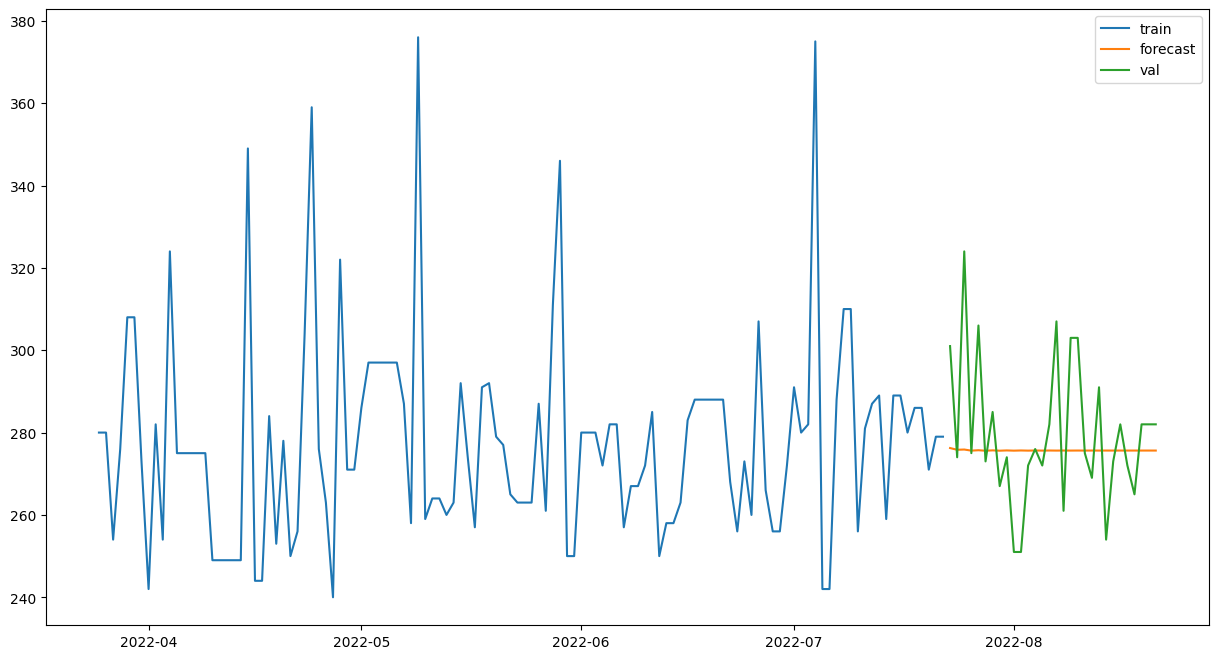

In [172]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred2_1, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

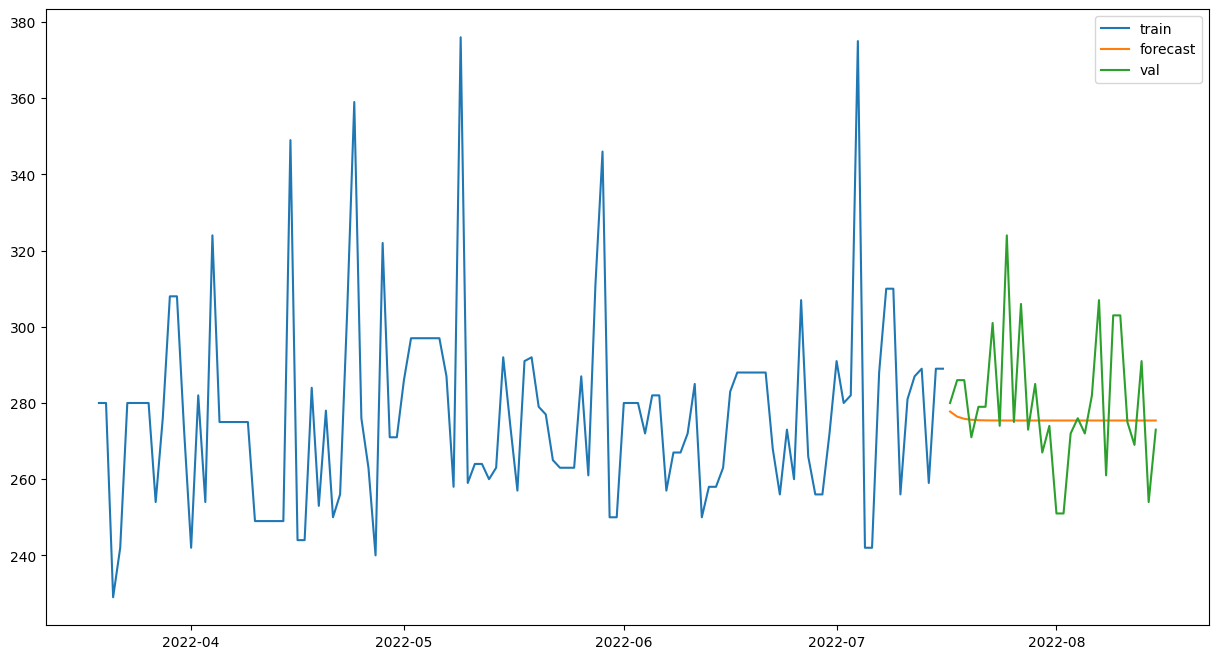

In [348]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred2_2, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

## ARIMAX

In [402]:
val_size = 30
x_train, y_train = x[:-val_size], y[:-val_size]
x_val, y_val = x[-val_size:], y[-val_size:]

In [350]:
model3_1 = sm.tsa.SARIMAX(y_train, order=(1,1,2), exog=x_train).fit()
model3_2 = sm.tsa.SARIMAX(y_train, order=(3,0,0), exog=x_train).fit()

In [352]:
residuals = model3_1.resid
residual_diag(residuals)

* 정규성 검정(> 0.05) :  0.0


AttributeError: module 'statsmodels.tsa.stattools' has no attribute 'adf_testuller'

In [353]:
pred3_1 = model3_1.forecast(30,  exog=x_val)
mean_absolute_percentage_error(y_val, pred3_1)

0.041776272638406955

In [354]:
residuals = model3_2.resid
residual_diag(residuals)
pred3_2 = model3_2.forecast(30,  exog=x_val)
mean_absolute_percentage_error(y_val, pred3_2)

* 정규성 검정(> 0.05) :  0.0


AttributeError: module 'statsmodels.tsa.stattools' has no attribute 'adf_testuller'

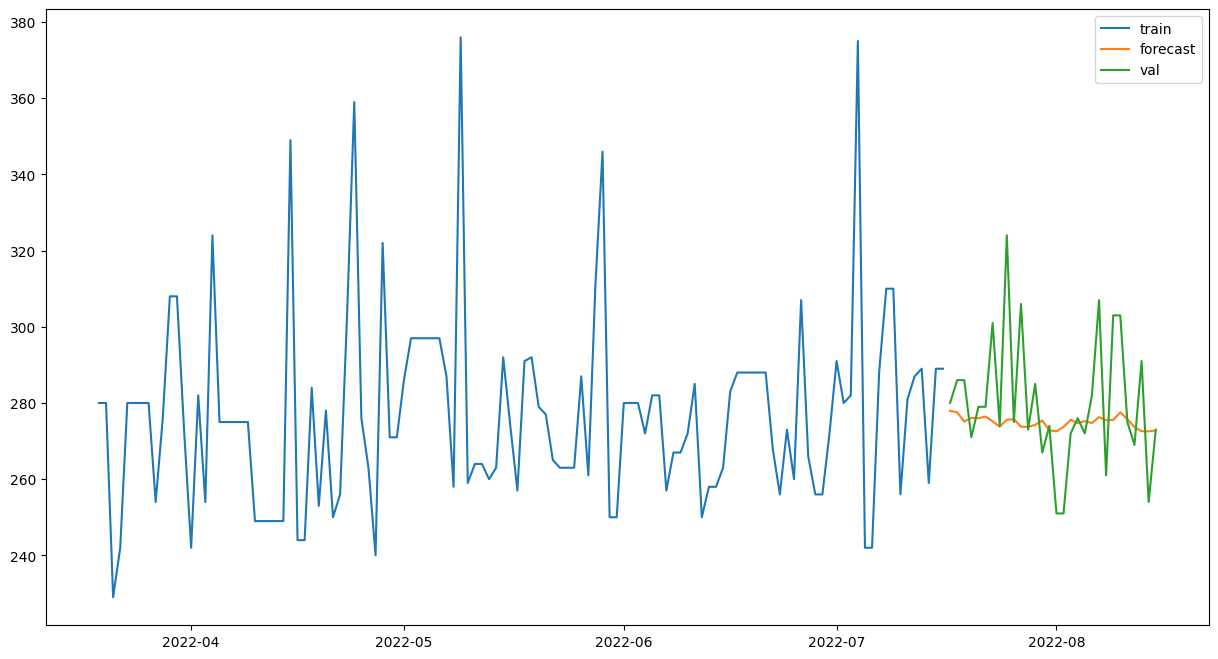

In [356]:
pred3_1.index = val.index

plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_1, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend() 
plt.show()

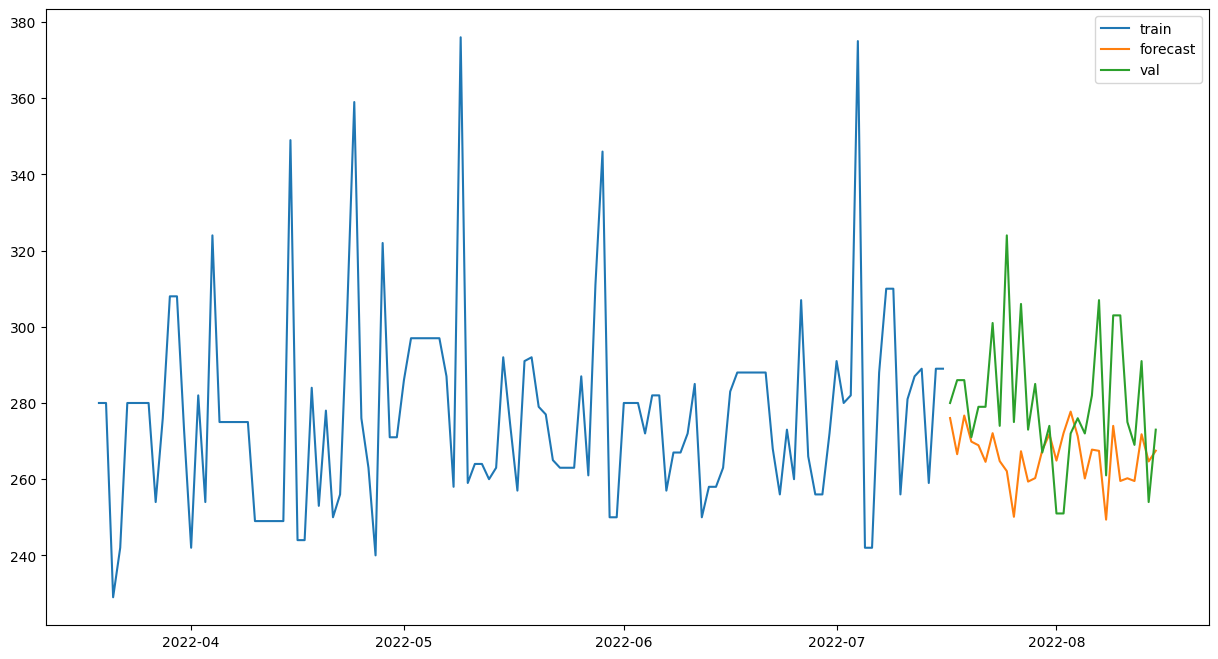

In [357]:
pred3_2.index = val.index

plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_2, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend() 
plt.show()

## SARIMAX

In [406]:
x_train

,12시,교통량,추석,추석_D+1,추석_D-1,추석_D-7,12시_lag_day1,12시_lag_day7,12시_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
일자,,,,,,,,,,,,
2017-08-29,263,19.0,0,0,0,0,263.0,259.0,261.0,20.0,17.0,35.0
2017-08-30,263,16.0,0,0,0,0,263.0,274.0,300.0,19.0,15.0,37.0
2017-08-31,277,13.0,0,0,0,0,263.0,273.0,300.0,16.0,15.0,39.0
2017-09-01,277,16.0,0,0,0,0,277.0,273.0,278.0,13.0,21.0,56.0
2017-09-02,267,26.0,0,0,0,0,277.0,288.0,286.0,16.0,35.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-12,242,7.0,0,0,0,0,375.0,256.0,282.0,8.0,10.0,11.0
2022-07-13,242,12.0,0,0,0,0,242.0,256.0,282.0,7.0,6.0,7.0
2022-07-14,288,11.0,0,0,0,0,242.0,272.0,257.0,12.0,13.0,10.0


In [412]:
P = [1,2,3]
Q = [1,2,3]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(3,0,0), seasonal_order=(i[0],i[1],i[2],5),exog=x_train).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(val, pred))
    aic.append(model_fit.aic)
    print(i)

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [361]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(P,D,Q)",mae,aic
0,"(1, 0, 1)",13.448399,16928.097928


,"params(P,D,Q)",mae,aic
0,"(1, 0, 1)",13.448399,16928.097928


In [427]:
model3_2 = sm.tsa.SARIMAX(y_train, order=(3,0,0), seasonal_order=(1,0,1,5),exog=x_train).fit()


In [428]:
pred3_2 = model3_2.forecast(30,exog=x_val)
mean_absolute_percentage_error(y_val, pred3_2)

0.04954323596082343

In [429]:
residuals = model3_2.resid
residual_diag(residuals)
pred3_2 = model3_2.forecast(30,  exog=x_val)
mean_absolute_percentage_error(y_val, pred3_2)

* 정규성 검정(> 0.05) :  0.0


AttributeError: module 'statsmodels.tsa.stattools' has no attribute 'adf_testuller'

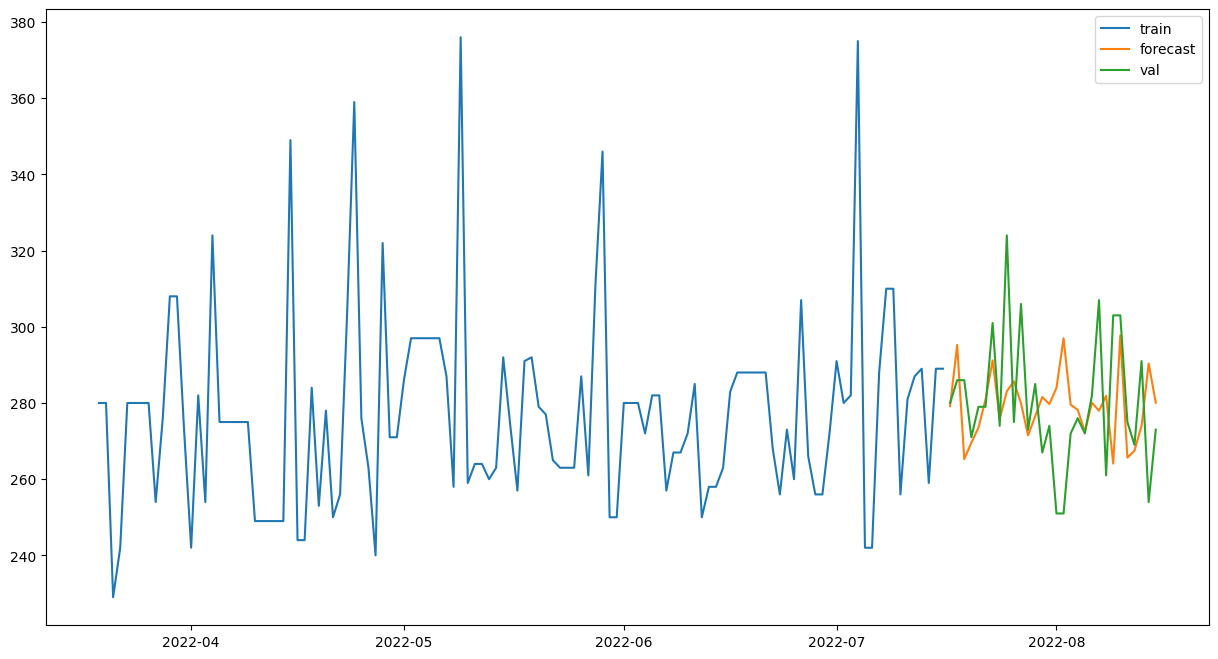

In [430]:
pred3_2.index = y_val.index

plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_2, label = 'forecast')
plt.plot(y_val, label = 'val')
plt.legend() 
plt.show()

------

# 예측

## 예측 데이터 만들기


In [451]:
df_time = pd.DataFrame()

for i in range(1,3):
    df = pd.read_csv(f'./test_data/이동시간_{i}.csv',encoding='cp949')

    df.drop(['출발','도착','자료종류'],axis=1,inplace=True)

    df = df.transpose()

    df.columns = df.loc['시간',:]
    df.drop('시간',inplace=True)

    df = df.replace('0', np.NaN)
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    
    df_time = pd.concat([df_time,df[['12시']]])
    
df_time['12시'] = df_time['12시'].apply(func)
df_time.index = pd.to_datetime(df_time.index)
df_time['dt'] = df_time.index


df_time = df_time.drop_duplicates('dt')
df_time = df_time.asfreq('D')
df_time.set_index('dt', inplace=True)
df_time
#df.drop('dt',inplace=True)
#df_time.index
#df_time.isna().sum()

시간,12시
dt,
2022-07-05,256
2022-07-06,256
2022-07-07,272
2022-07-08,291
2022-07-09,280
2022-07-10,282
2022-07-11,375
2022-07-12,242
2022-07-13,242


In [452]:
df_traffic1 = pd.read_csv('./test_data/통행량_1.csv',encoding='cp949')
df_traffic2 = pd.read_csv('./test_data/통행량_2.csv',encoding='cp949')
df_traffic = pd.concat([df_traffic2,df_traffic1])
df_traffic.drop(['출발','도착'],axis=1,inplace=True)
df_traffic.drop_duplicates('일자',inplace=True)
df_traffic

,일자,교통량
0,2022.07.05,10
1,2022.07.06,6
2,2022.07.07,13
3,2022.07.08,18
4,2022.07.09,16
...,...,...
26,2022.08.31,10
27,2022.09.01,7
28,2022.09.02,10
29,2022.09.03,15


In [453]:
df_traffic['일자'] = pd.to_datetime(df_traffic['일자'])
df_traffic.drop_duplicates('일자',inplace=True)
df_traffic.set_index('일자', inplace=True)

df_traffic = df_traffic.asfreq('D')

In [454]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2022-07-05 to 2022-09-04
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   교통량     62 non-null     int64
dtypes: int64(1)
memory usage: 992.0 bytes


In [455]:
df_test= pd.merge(df_time,df_traffic,left_index=True,right_on='일자')

In [456]:
lst = []

for idx in df_test.index :
    chuseok = pytimekr.chuseok(idx.year)
    if idx.strftime('%Y-%m-%d') == chuseok.strftime('%Y-%m-%d'):
        lst.append(1)
        print('1')
    else:
        lst.append(0)
df_test['추석'] = lst

In [457]:
df_test['추석_D+1'] = df_test['추석'].shift()
df_test['추석_D-1'] = df_test['추석'].shift(-1)
df_test['추석_D-7'] = df_test['추석'].shift(7)
df_test['12시_lag_day1'] = df_test['12시'].shift()
df_test['12시_lag_day7'] = df_test['12시'].shift(7)
df_test['12시_lag_day30'] = df_test['12시'].shift(30)
df_test['교통량_lag_day1'] = df_test['교통량'].shift()
df_test['교통량_lag_day7'] = df_test['교통량'].shift(7)
df_test['교통량_lag_day30'] = df_test['교통량'].shift(30)

In [458]:
df_test = df_test.asfreq('D')

In [459]:
df_test.loc['2022-09-02','추석_D-7'] = 1
df_test.loc['2022-09-02','추석_D-1'] = 0

In [461]:
df_test.tail(1)

,12시,교통량,추석,추석_D+1,추석_D-1,추석_D-7,12시_lag_day1,12시_lag_day7,12시_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
일자,,,,,,,,,,,,
2022-08-29,300,12,0,0.0,0.0,0.0,282.0,273.0,301.0,11.0,4.0,15.0
2022-08-30,300,11,0,0.0,0.0,0.0,300.0,282.0,274.0,12.0,11.0,32.0
2022-08-31,300,10,0,0.0,0.0,0.0,300.0,252.0,324.0,11.0,13.0,23.0
2022-09-01,321,7,0,0.0,0.0,0.0,300.0,268.0,275.0,10.0,10.0,16.0
2022-09-02,292,10,0,0.0,0.0,1.0,321.0,282.0,306.0,7.0,11.0,16.0


-------

In [462]:
pred_res = model3_2.forecast(1,exog=df_test.tail(1))

In [463]:
pred_res

1767    258.906306
dtype: float64